# Working with Synthesis AI dataset landmarks

First, we install `synthesisai` and download test datasets.

In [ ]:
%%bash
python -m pip install synthesisai
curl https://synthesisai-example-datasets.s3.amazonaws.com/humans_api_example_dataset.zip -o humans_api_example_dataset.zip
unzip humans_api_example_dataset.zip -d humans_api_example_dataset

Now we add some imports for the visualisation.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

We use `SaiDataset` class to access synthesis datasets.


In [3]:
from synthesisai import SaiDataset, Modality

**Warning!** Some of modalities requires additional libraries to be installed:
`SEGMENTS` and `RGB` modalities use `opencv-python` library,
 while `DEPTH`, `ALPHA` and `NORMALS` modalities
 use `tiffile`  and `imagecodecs` libraries for effective work with floating point tiff files.
 If dataset with these modalities will be created without corresponding libraries present, an `ImportError` is raised.


In [4]:
data_root = "humans_api_example_dataset"
dataset = SaiDataset(
    data_root,
    modalities=[
        Modality.RGB, Modality.LANDMARKS_IBUG68, Modality.LANDMARKS_CONTOUR_IBUG68,
        Modality.LANDMARKS_COCO, Modality.LANDMARKS_KINECT_V2, Modality.LANDMARKS_MEDIAPIPE,
        Modality.LANDMARKS_MPEG4, Modality.LANDMARKS_MEDIAPIPE_FACE, Modality.LANDMARKS_SAI
    ]
)

The only required parameter is dataset root. By default all the modailities are loaded.

In [5]:
len(dataset)

129

There are 129 items in the test dataset. Let's explore them closer.

In [6]:
item = dataset[0]
item2 = dataset[1]

Each item is a dict with different modalities as keys.

In [7]:
print(item.keys())

dict_keys([<Modality.RGB: 2>, <Modality.LANDMARKS_IBUG68: 9>, <Modality.LANDMARKS_CONTOUR_IBUG68: 10>, <Modality.LANDMARKS_KINECT_V2: 11>, <Modality.LANDMARKS_MEDIAPIPE: 12>, <Modality.LANDMARKS_COCO: 13>, <Modality.LANDMARKS_MPEG4: 14>, <Modality.LANDMARKS_MEDIAPIPE_FACE: 40>, <Modality.LANDMARKS_SAI: 41>])


Landmarks are in iBUG format. Each of 68 landmarks is represented by its `x` and `y` coordinates in image space,
`y` coordinate going from top to bottom.

In [8]:
def landmark_show(img, landmarks, radius=2, labels=True, font_scale=0.25):
    l_img = np.copy(img)
    for name, (x, y) in landmarks.items():
        int_p = (int(x), int(y))
        cv2.circle(l_img, int_p, radius=radius, color=(255, 0, 0), thickness=cv2.FILLED)
        if labels:
            l_img = cv2.putText(l_img, str(name), int_p, cv2.FONT_HERSHEY_SIMPLEX,
                                font_scale, (0, 255, 0), 1, cv2.LINE_AA)

    plt.imshow(l_img)

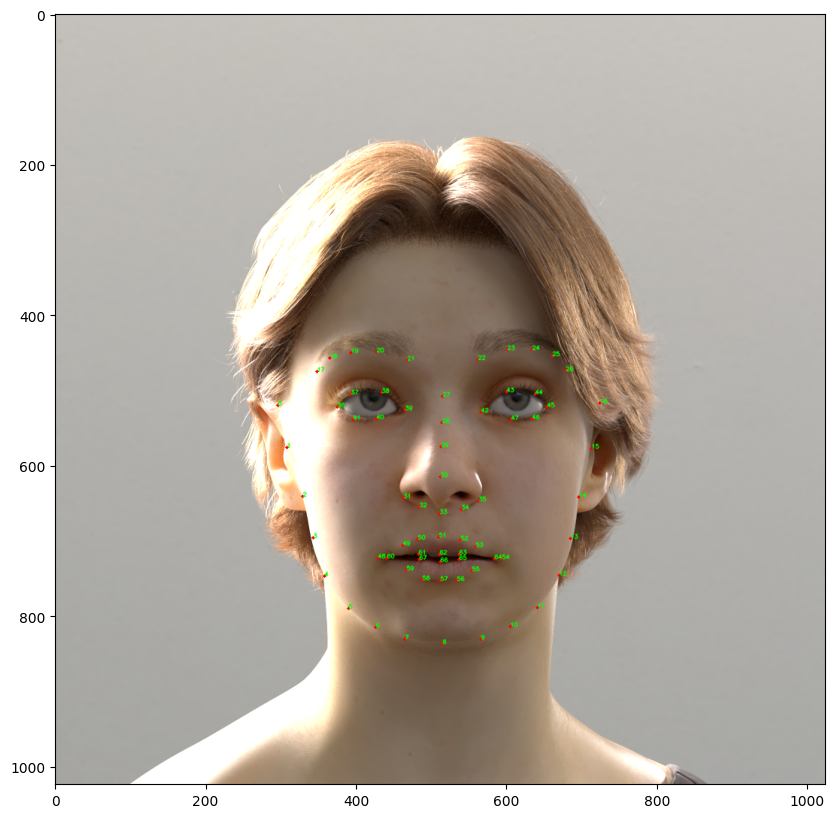

In [9]:
item = dataset[8]
plt.figure(figsize=(10,10))
# this loop will only iterate once since there is only one human in this example
for human_instance_id, landmarks in item[Modality.LANDMARKS_IBUG68].items():
    landmark_show(item[Modality.RGB], landmarks)

**Warning!** Contour landmarks are slightly different from iBUG.
Instead of showing the contour of the face in our dataset they have the fixed position on the face.

This looks a bit strange on rotated images, but these landmarks are more useful for multiple tasks,
such as facial pose retrival and special effects.

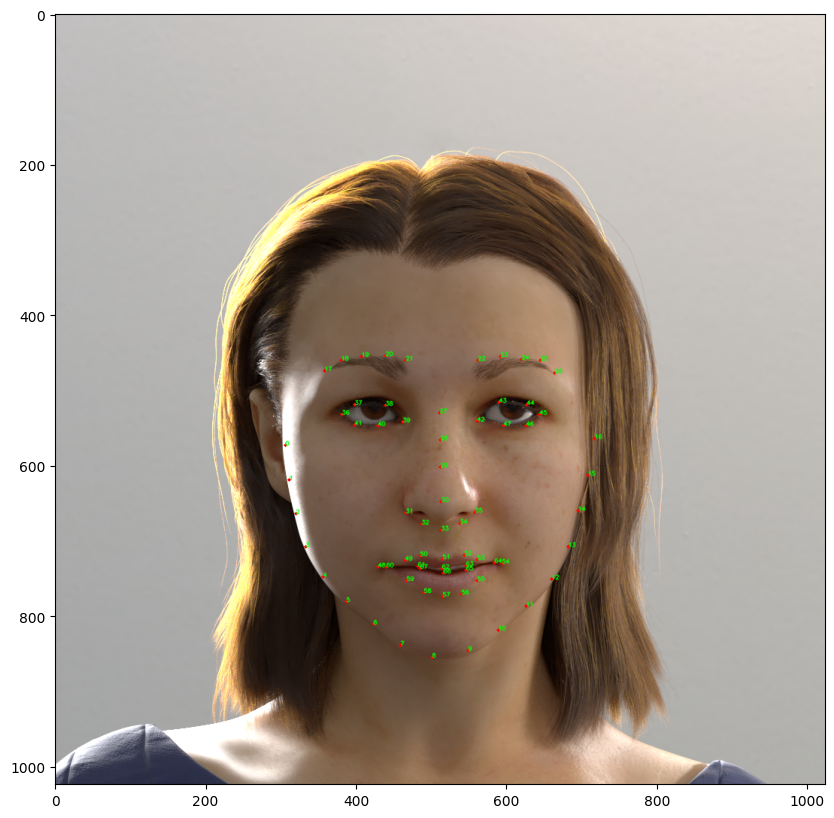

In [10]:
item = dataset[10]
plt.figure(figsize=(10,10))
# this loop will only iterate once since there is only one human in this example
for human_instance_id, landmarks in item[Modality.LANDMARKS_CONTOUR_IBUG68].items():
    landmark_show(item[Modality.RGB], landmarks)

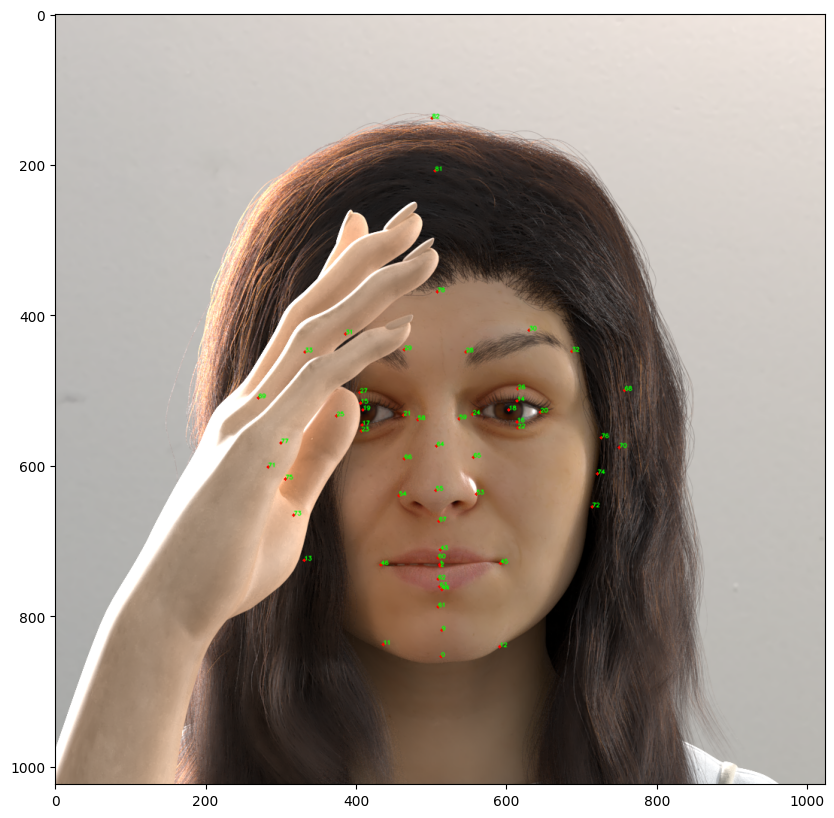

In [11]:
item = dataset[12]
plt.figure(figsize=(10,10))
# this loop will only iterate once since there is only one human in this example
for human_instance_id, landmarks in item[Modality.LANDMARKS_MPEG4].items():
    landmark_show(item[Modality.RGB], landmarks)

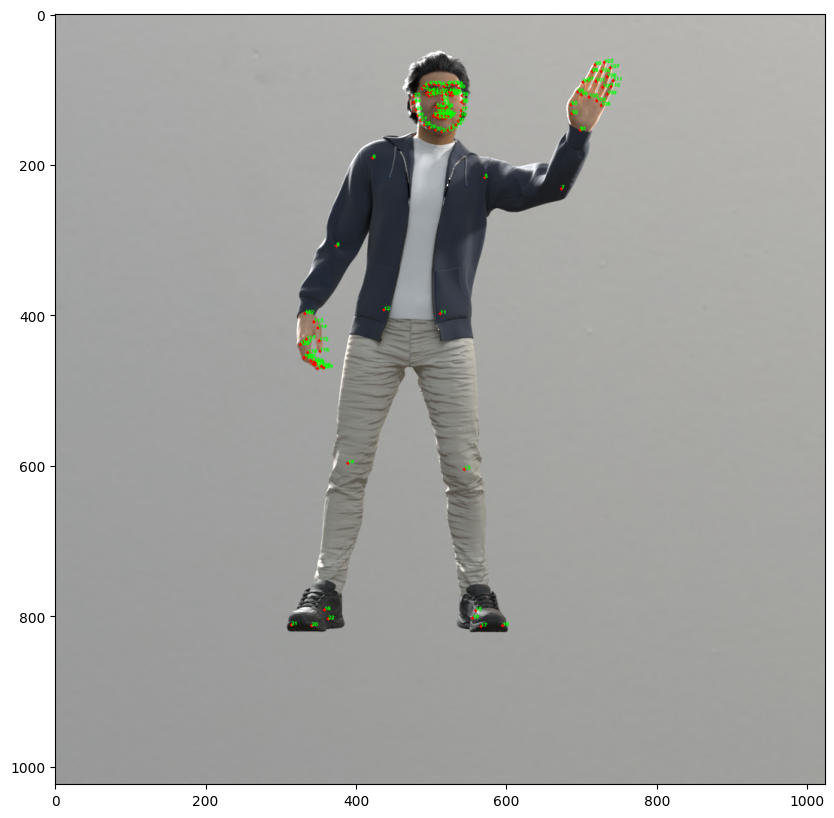

In [12]:
item = dataset[64]
plt.figure(figsize=(10,10))
# this loop will only iterate once since there is only one human in this example
for human_instance_id, landmarks in item[Modality.LANDMARKS_COCO].items():
    landmark_show(item[Modality.RGB], landmarks, font_scale=0.2)

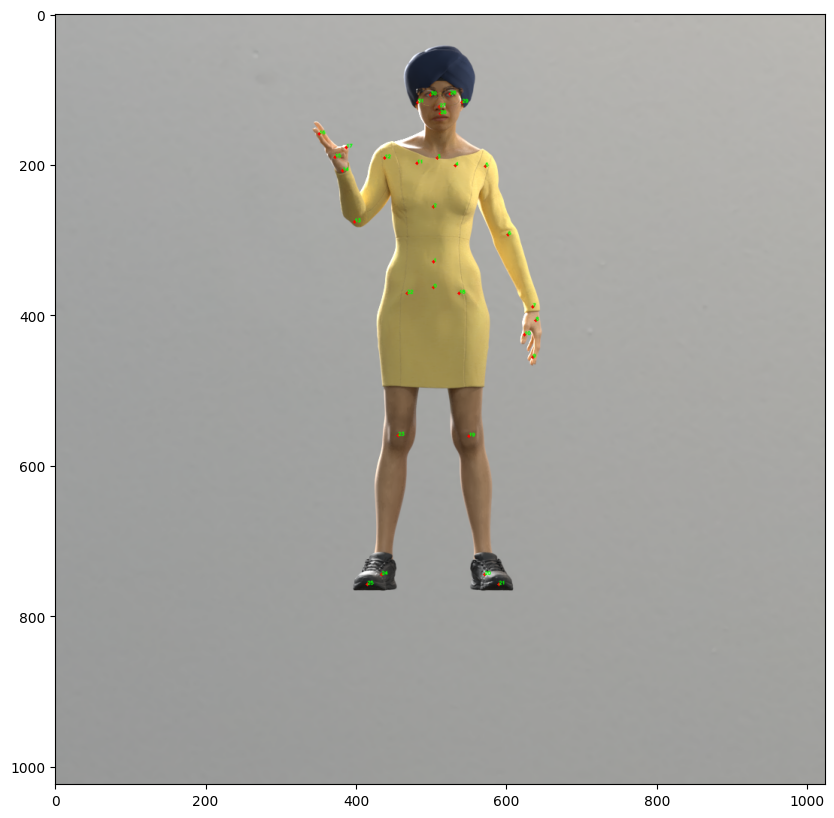

In [13]:
item = dataset[66]
plt.figure(figsize=(10,10))
# this loop will only iterate once since there is only one human in this example
for human_instance_id, landmarks in item[Modality.LANDMARKS_KINECT_V2].items():
    landmark_show(item[Modality.RGB], landmarks, font_scale=0.2)

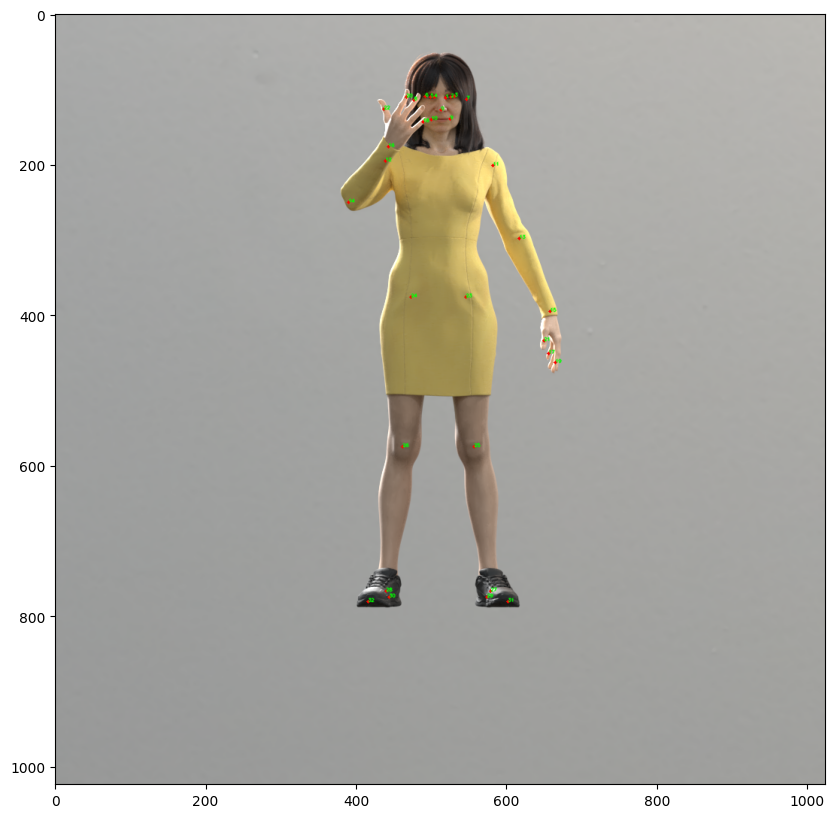

In [14]:
item = dataset[68]
plt.figure(figsize=(10,10))
for human_instance_id, landmarks in item[Modality.LANDMARKS_MEDIAPIPE].items():
    landmark_show(item[Modality.RGB], landmarks, font_scale=0.2)

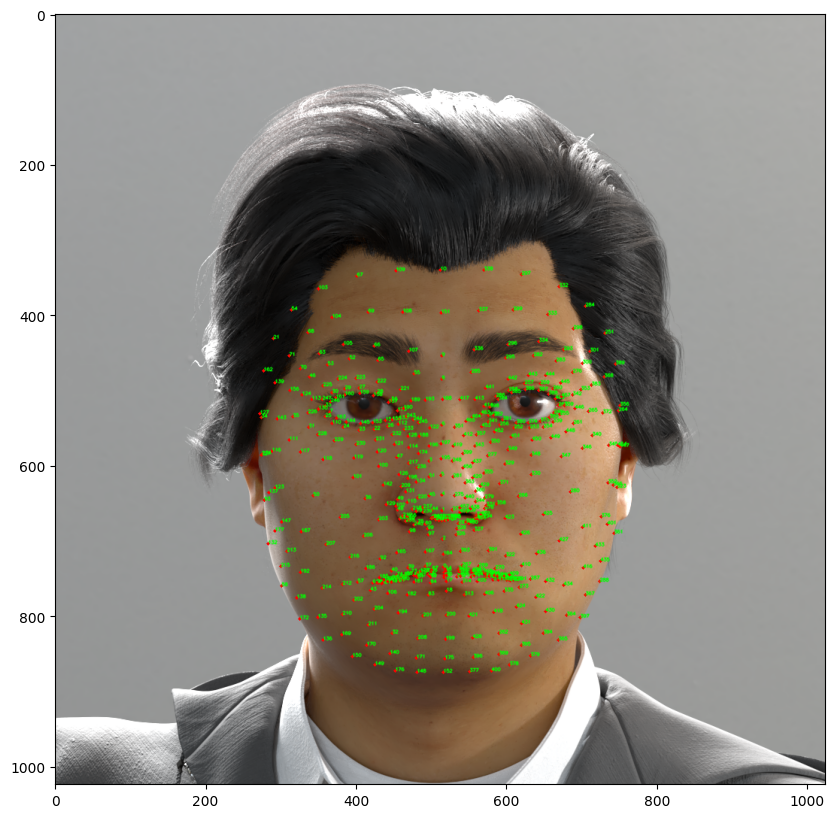

In [15]:
item = dataset[2]
plt.figure(figsize=(10,10))
# this loop will only iterate once since there is only one human in this example
for human_instance_id, landmarks in item[Modality.LANDMARKS_MEDIAPIPE_FACE].items():
    landmark_show(item[Modality.RGB], landmarks, font_scale=0.2)

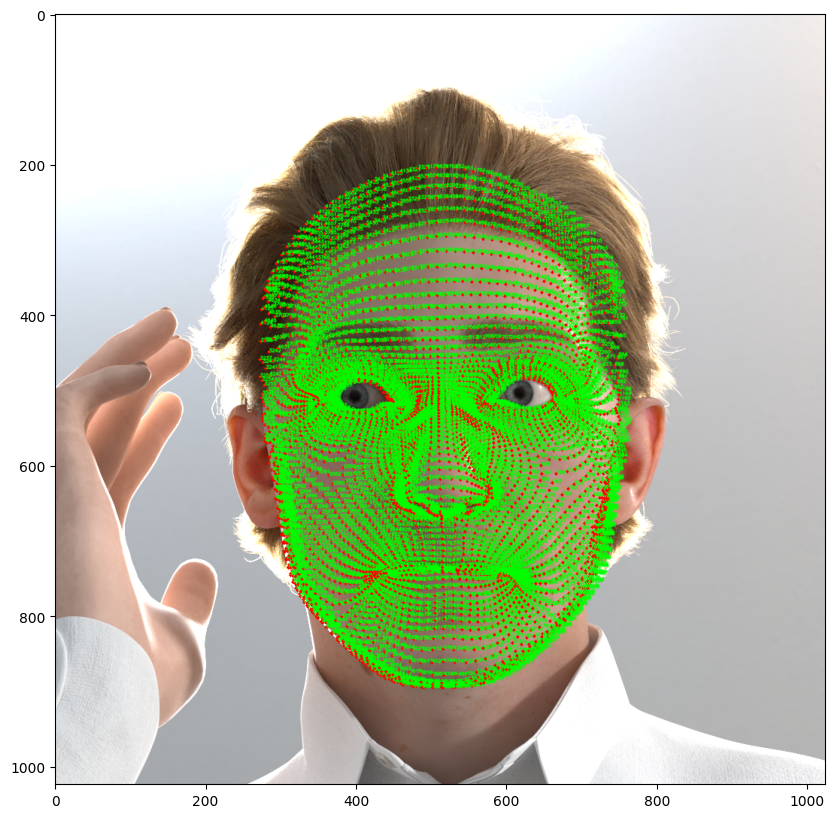

In [16]:
item = dataset[4]
plt.figure(figsize=(10,10))
# this loop will only iterate once since there is only one human in this example
for human_instance_id, landmarks in item[Modality.LANDMARKS_SAI].items():
    landmark_show(item[Modality.RGB], landmarks, font_scale=0.2)